# Proyecto final. Datamining.
### Análisis tweets UEFA Champions League Final 2018

### Participantes:

Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro - Alejandro Amarillas Cámara - Sergio Sampio Balmaseda.

### Notebook (1/4). Preprocesamiento y transformación del dataset.

### Objetivo del notebook:

Este notebook se centra en preprocesar el dataset, limpiando las columnas existentes y generando aquellas nuevas que sean necesarias.<br><br>

![title](Images/background.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from Library.Apriori import APriori
from wordcloud import WordCloud, STOPWORDS

In [2]:
Datos = pd.read_json("datos_limpios.json")
len(Datos)

330384

In [3]:
Datos["hora"] = pd.to_datetime(Datos["hora"])
Datos["min"] = Datos["hora"].dt.minute
Datos["hour"] = Datos["hora"].dt.hour
del Datos["hora"]

In [4]:
Datos = Datos[Datos["hour"] > 15]
len(Datos)

330323

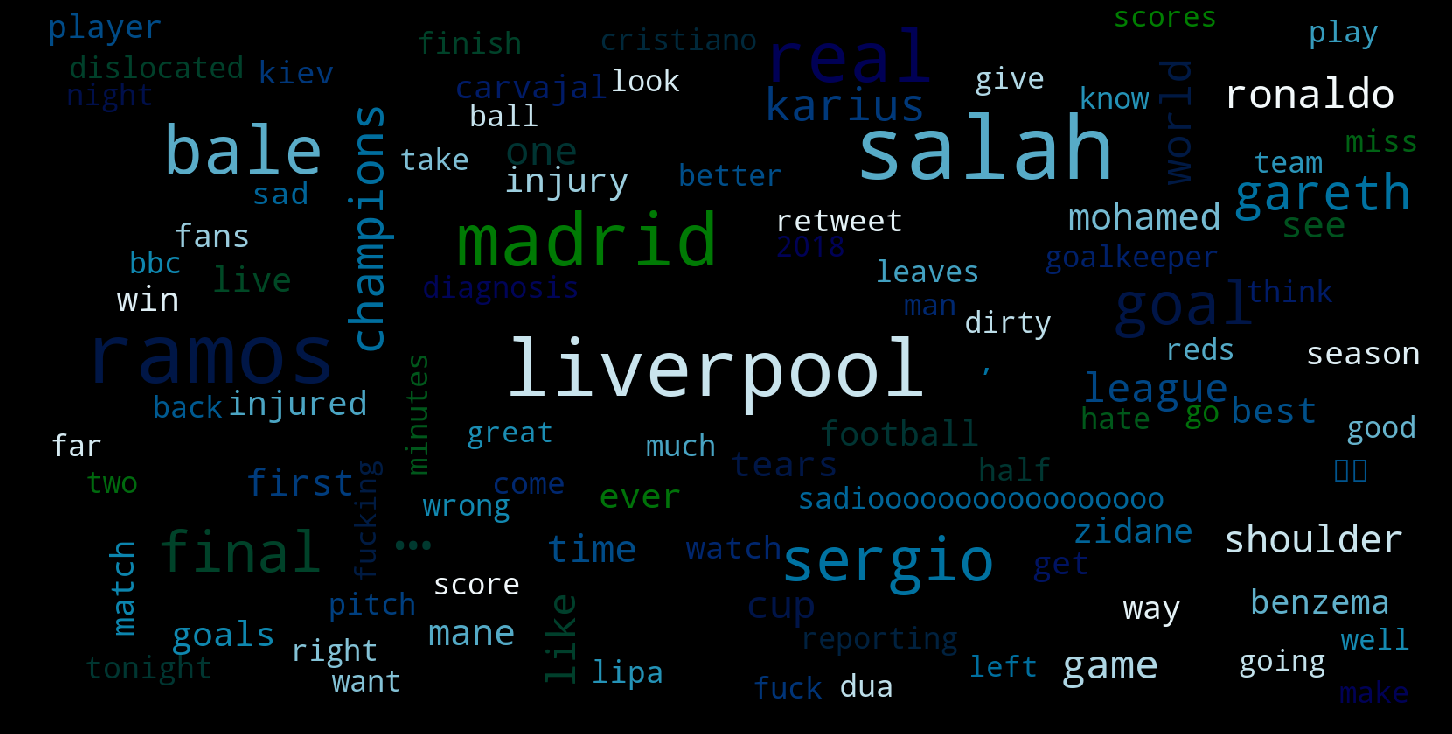

In [5]:
# split sentences to get individual words
all_words = []
for line in Datos["tokens"] : # try 'tokens'
    #print(line)
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=1600,
                      height=800,
                      max_words=100,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap="ocean",
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
Datos.pivot_table(index=['hour'], columns='sentimiento_tipo', aggfunc='size', fill_value=0)

sentimiento_tipo,NEGATIVE,NEUTRAL,POSITIVE
hour,,,
20,3716,17827,11835
21,57217,63627,44049
22,25701,62349,44002
